# HMM-RNN Experiments

This notebook demonstrates how to run experiments using the MANAGER class.

In [1]:
import os
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Import our modules
from scripts.manager import Manager
from scripts.rnn import RNN

## Run a Single Experiment

Let's run a single experiment with verbose output to see the training progress.

In [ ]:
# Initialize the experiment manager with a small HMM configuration
manager = Manager(config_name="HMMTwo_inter")

# Print the configuration
print("Configuration:")
for key, value in manager.config.items():
    print(f"  {key}: {value}")

NameError: name 'Manager' is not defined

In [ ]:
# Run the experiment with verbose output
results = manager.run_experiment(verbose=True)

Starting experiment at 2025-03-04 14:41:38.394265
Configuration saved to Experiments/20250304_144132/HMMTwo_RG/config.pkl and Experiments/20250304_144132/HMMTwo_RG/config.json
Starting RNN training...
Transition Matrix:
[[0.95 0.05]
 [0.05 0.95]]
Using custom emission matrix
Generating HMM data...
Splitting data...
HMM data saved to Experiments/20250304_144132/HMMTwo_RG/data/hmm_sequences.pkl
Training with learning rate: 0.005
Training on device: cuda
Epoch [1/1000], Train Loss: 43.8871, Val Loss: 45.9264
Epoch [10/1000], Train Loss: 35.8426, Val Loss: 35.6926
Epoch [20/1000], Train Loss: 35.5357, Val Loss: 35.5208


KeyboardInterrupt: 

Created directory structure in Experiments/20250304_165943/HMMThree_RGB
Running reverse-engineering analysis...
Model loaded from Experiments/20250304_162931/HMMThree_RGB/models/3HMM_3Outputs_custom_30kData_0.001lr_30.4Loss.pth
Generating RNN sequences for PCA...


/home/elia/Documents/rnnrep/scripts/rnn.py:248: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(path, map_location=self.device))


Running PCA...
Explained variance ratio: [0.9215994  0.04847329 0.01797062 0.00408706 0.0024104 ]
Generating 2D PCA trajectory plot...
2D trajectory plot saved to Experiments/20250304_162931/HMMThree_RGB/figs/latent_trajectory_2d.pdf
Generating 3D PCA trajectory plot...
3D trajectory plot saved to Experiments/20250304_162931/HMMThree_RGB/figs/latent_trajectory_3d.html
GPU memory cleared


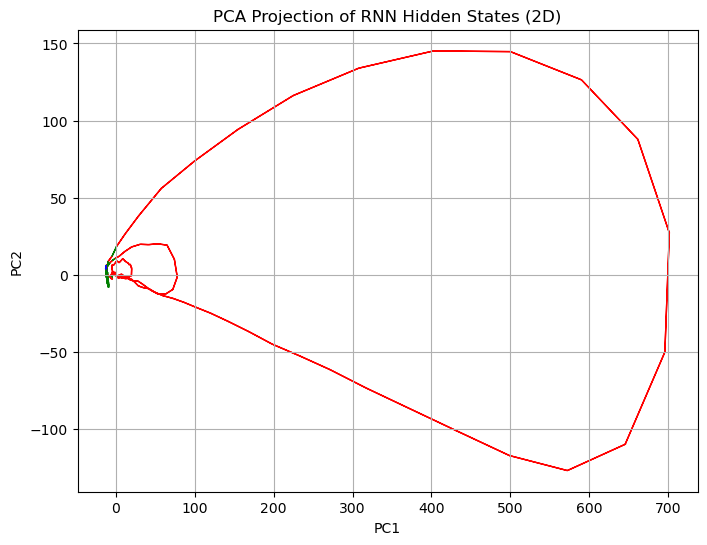

In [ ]:
manager = Manager(config_name="HMMThree_RGB")

# Point to the experiment directory where your model is saved
manager.config_dir = Path("Experiments/20250304_162931/HMMThree_RGB")
manager.models_path = manager.config_dir / "models"
manager.figs_path = manager.config_dir / "figs"
manager.data_path = manager.config_dir / "data"

pca_results = manager.run_reverse()

## Explore the Results

After the experiment completes, we can explore the results directory.

In [ ]:
# Show the experiment directory structure
import os

def print_directory_tree(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        sub_indent = ' ' * 4 * (level + 1)
        for f in files:
            print(f"{sub_indent}{f}")

print_directory_tree("Experiments")

## Running Multiple Experiments

You can also run multiple experiments in sequence.

In [2]:
# Create a new manager
multi_manager = Manager()

# Run multiple experiments
# Only uncommment this if you want to run more lengthy experiments
config_names = ["HMMTwo_inter", "HMMThree_inter", "HMMFour_inter", "HMMFive_inter"]
all_results = multi_manager.run_multiple_experiments(config_names, verbose=False)

Created directory structure in Experiments/20250312_011546/CustomConfig
Running experiment with config: HMMTwo_inter
Created directory structure in Experiments/20250312_011546/HMMTwo_inter
Starting experiment at 2025-03-12 01:15:46.457169
Configuration saved to Experiments/20250312_011546/HMMTwo_inter/config.pkl and Experiments/20250312_011546/HMMTwo_inter/config.json
Starting RNN training...
Transition Matrix:
[[0.99 0.01]
 [0.01 0.99]]
Emission Probabilities:
[[0.99 0.01 0.  ]
 [0.   0.01 0.99]]
Generating HMM data...
Splitting data...
HMM data saved to Experiments/20250312_011546/HMMTwo_inter/data/hmm_sequences.pkl
Training with learning rate: 0.001
Model saved to Experiments/20250312_011546/HMMTwo_inter/models/2HMM_3Outputs_linear_30kData_0.001lr_0.8Loss.pth
Loss plot saved to Experiments/20250312_011546/HMMTwo_inter/figs/loss_curves.pdf
Best model achieved with learning rate 0.001 and loss 0.762115
GPU memory cleared
Running model tests...
Generating test data...
Generating HMM te

/home/elia/Documents/rnnrep/scripts/test.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq1_flat = torch.tensor(seq1_flat).float().to(self.device)
/home/elia/Documents/rnnrep/scripts/test.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq2_flat = torch.tensor(seq2_flat).float().to(self.device)


Calculating volatilities...
Calculating frequencies...
Calculating transition matrices...


posx and posy should be finite values
posx and posy should be finite values


Generating comparison plots...
Plots saved to Experiments/20250312_011546/HMMTwo_inter/figs
GPU memory cleared
Running reverse-engineering analysis...
Generating RNN sequences for PCA...
Running PCA...
Error running experiment: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Traceback (most recent call last):
  File "/home/elia/Documents/rnnrep/scripts/manager.py", line 497, in run_multiple_experiments
    results = se

/home/elia/Documents/rnnrep/scripts/test.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq1_flat = torch.tensor(seq1_flat).float().to(self.device)
/home/elia/Documents/rnnrep/scripts/test.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq2_flat = torch.tensor(seq2_flat).float().to(self.device)


KeyboardInterrupt: 

## Fixed Point Finder

### From Directory

In [2]:
manager = Manager(config_name="HMMThree_RGB")

# Point to the experiment directory where your model is saved
manager.config_dir = Path("Experiments/20250304_162931/HMMThree_RGB")
manager.models_path = manager.config_dir / "models"
manager.figs_path = manager.config_dir / "figs"
manager.data_path = manager.config_dir / "data"

Created directory structure in Experiments/20250305_224203/HMMThree_RGB


/home/elia/Documents/rnnrep/scripts/rnn.py:248: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(path, map_location=self.device))


Model loaded from Experiments/20250304_162931/HMMThree_RGB/models/3HMM_3Outputs_custom_30kData_0.001lr_30.4Loss.pth

Searching for fixed points from 1000 initial states.

	Freezing model parameters so model is not affected by fixed point optimization.
	Finding fixed points via joint optimization.
	Optimization complete to desired tolerance.
		2 iters
		q = 0.00e+00 +/- 0.00e+00
		dq = 0.00e+00 +/- 0.00e+00
		learning rate = 1.00e+00
		avg iter time = 5.65e-03 sec
	Identified 1 unique fixed points.
		initial_states: 1000 outliers detected (of 1000).
		fixed points: 1 outliers detected (of 1).
	Decomposing Jacobians in a single batch.
	Sorting by Eigenvalue magnitude.
	Fixed point finding complete.

All fixed points saved to Experiments/20250304_162931/HMMThree_RGB/fixed_points_all.pkl
Unique fixed points saved to Experiments/20250304_162931/HMMThree_RGB/fixed_points_unique.pkl


/home/elia/Documents/rnnrep/fixed_point_finder/FixedPointFinderBase.py:734: RuntimeWarning: invalid value encountered in divide
  scaled_init_dists = np.true_divide(init_dists, avg_init_dist)
/home/elia/Documents/rnnrep/fixed_point_finder/FixedPointFinderBase.py:740: RuntimeWarning: invalid value encountered in divide
  scaled_fps_dists = np.true_divide(fps_dists, avg_init_dist)
/home/elia/anaconda3/envs/deep/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:653: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


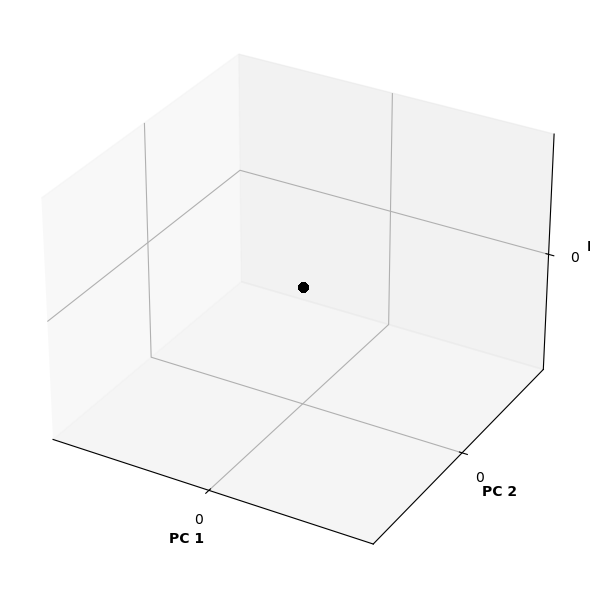

Fixed points plot saved to Experiments/20250304_162931/HMMThree_RGB/figs/fixed_points_unique_plot.pdf
Found 0 total fixed points, 1000 unique fixed points


In [4]:
all_fps, unique_fps = manager.find_fixed_points(num_initial_states=1000)
print(f"Found {len(all_fps)} total fixed points, {len(unique_fps)} unique fixed points")

### From .pth Model

Created directory structure in Experiments/20250306_003127/CustomConfig
Model loaded from /home/elia/Documents/rnnrep/old_models/5HMM_3Outputs_30kData_0.001lr_37.3Loss.pth


/home/elia/Documents/rnnrep/scripts/rnn.py:248: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(path, map_location=self.device))



Searching for fixed points from 1000 initial states.

	Freezing model parameters so model is not affected by fixed point optimization.
	Finding fixed points via joint optimization.
	Optimization complete to desired tolerance.
		2 iters
		q = 0.00e+00 +/- 0.00e+00
		dq = 0.00e+00 +/- 0.00e+00
		learning rate = 1.00e+00
		avg iter time = 7.83e-04 sec
	Identified 1 unique fixed points.
		initial_states: 1000 outliers detected (of 1000).
		fixed points: 1 outliers detected (of 1).
	Decomposing Jacobians in a single batch.
	Sorting by Eigenvalue magnitude.
	Fixed point finding complete.

All fixed points saved to Experiments/20250306_003127/CustomConfig/fixed_points_all.pkl
Unique fixed points saved to Experiments/20250306_003127/CustomConfig/fixed_points_unique.pkl


/home/elia/Documents/rnnrep/fixed_point_finder/FixedPointFinderBase.py:734: RuntimeWarning: invalid value encountered in divide
  scaled_init_dists = np.true_divide(init_dists, avg_init_dist)
/home/elia/Documents/rnnrep/fixed_point_finder/FixedPointFinderBase.py:740: RuntimeWarning: invalid value encountered in divide
  scaled_fps_dists = np.true_divide(fps_dists, avg_init_dist)
/home/elia/anaconda3/envs/deep/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:653: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


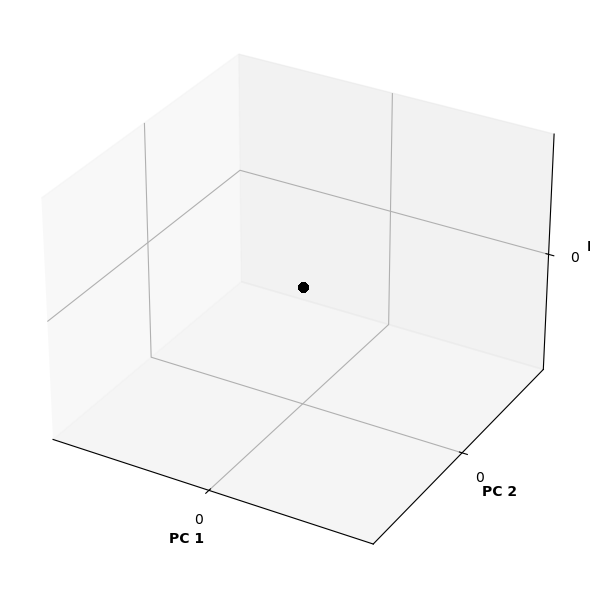

Fixed points plot saved to Experiments/20250306_003127/CustomConfig/figs/fixed_points_unique_plot.pdf
Found 0 total fixed points, 1000 unique fixed points


In [5]:
#old_models
#/home/elia/Documents/rnnrep/old_models/2HMM_3Outputs_30kData_0.001lr_19.4Loss.pth
#/home/elia/Documents/rnnrep/old_models/3HMM_3Outputs_30kData_0.001lr_31.9Loss.pth
#/home/elia/Documents/rnnrep/old_models/4HMM_3Outputs_30kData_0.001lr_33.2Loss.pth
#/home/elia/Documents/rnnrep/old_models/5HMM_3Outputs_30kData_0.001lr_37.3Loss.pth
manager = Manager()
all_fps, unique_fps = manager.find_fixed_points(num_initial_states=1000, num_traj=10, plot_unique=True, model_path="/home/elia/Documents/rnnrep/old_models/5HMM_3Outputs_30kData_0.001lr_37.3Loss.pth")
print(f"Found {len(all_fps)} total fixed points, {len(unique_fps)} unique fixed points")

## Exploration

In [22]:
model_path = "/home/elia/Documents/rnnrep/Experiments/20250302_011624/HMMTwo_inter/models/2HMM_3Outputs_linear_30kData_0.001lr_21.7Loss.pth"
rnn = RNN(
    input_size=100,
    hidden_size=150,
    num_layers=1,
    output_size=3,
)
rnn.load_model(str(model_path))

Model loaded from /home/elia/Documents/rnnrep/Experiments/20250302_011624/HMMTwo_inter/models/2HMM_3Outputs_linear_30kData_0.001lr_21.7Loss.pth


/home/elia/Documents/rnnrep/scripts/rnn.py:248: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(path, map_location=self.device))


In [57]:
seq = rnn.gen_seq(20000)